In [25]:
"""Analysis of results generated by the iterative round testing script"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "iterative_round_results_basic_j12_s2_0",
    "iterative_round_results_basic_j15_s2_0",
    "iterative_round_results_basic_j15_s3_0",
    "iterative_round_results_basic_j25_s5_0"
]

In [5]:
encoded_filenames = basic
x_axis = 'Total Iterations'  # ['Total Iterations', 'Total Messages', 'Total Money', 'Solve Time', 'Sum Value']
title = '{} of basic model'.format(x_axis)

In [23]:
data = []
test_name: str = ""

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename('iterative_round', encoded_filename)
    with open(filename) as file:
        file_data = json.load(file)
        for pos, model_result in enumerate(file_data):
            if len(model_result) > 15:
                max_iterations = model_result['cost 0, change 1']['total_iterations']
                max_money = model_result['cost 0, change 1']['total money']
                for name, result in model_result.items():
                    data.append([pos, model_name, name, result['initial_cost'], result['price_change'],
                                 result['total_iterations'], result['total_messages'], result['total money'],
                                 max_iterations / result['total_iterations'], max_money / result['total money']])

df = pd.DataFrame(data, columns=["Pos", "Model Name", "Algorithm Name", "Initial cost", 
                                 "Price Change", "Total Iterations", "Total Messages", "Total Money", 
                                 "Total Iterations Speed", "Percent Total Money"])
df

,Pos,Model Name,Algorithm Name,Initial cost,Price Change,Total Iterations,Total Messages,Total Money,Total Iterations Speed,Percent Total Money
0,0,Jobs: 12 Servers: 2,"cost 0, change 1",0,1,239,1418,235,1.000000,1.000000
1,0,Jobs: 12 Servers: 2,"cost 0, change 2",0,2,125,734,242,1.912000,0.971074
2,0,Jobs: 12 Servers: 2,"cost 0, change 5",0,5,45,254,205,5.311111,1.146341
3,0,Jobs: 12 Servers: 2,"cost 0, change 10",0,10,27,146,230,8.851852,1.021739
4,0,Jobs: 12 Servers: 2,"cost 0, change 15",0,15,18,92,210,13.277778,1.119048
...,...,...,...,...,...,...,...,...,...,...
4995,49,Jobs: 25 Servers: 5,"cost 40, change 1",40,1,739,8837,733,0.986468,0.986357
4996,49,Jobs: 25 Servers: 5,"cost 40, change 2",40,2,306,3642,602,2.382353,1.200997
4997,49,Jobs: 25 Servers: 5,"cost 40, change 5",40,5,152,1793,730,4.796053,0.990411
4998,49,Jobs: 25 Servers: 5,"cost 40, change 10",40,10,74,858,690,9.851351,1.047826


In [ ]:
df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Initial cost', 'Price Change',
                                 'Total Iterations', 'Total Messages', 'Total Money', 'Solve Time', 'Sum Value'])
g = sns.FacetGrid(df, col='Model Name', sharex=False, margin_titles=True, height=4)
# noinspection PyUnresolvedReferences
(g.map(sns.barplot, x_axis, 'Algorithm Name').set_titles('{col_name}'))

for pos, model in enumerate(basic):
    values = [np.mean(df[(df['Model Name'] == model) & (df['Algorithm Name'] == algo)][x_axis])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.97, max(values) * 1.02)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

save_plot(analysis_filename(test_name, x_axis), 'iterative_round', image_formats=(ImageFormat.PNG, ImageFormat.EPS))
plt.show()

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


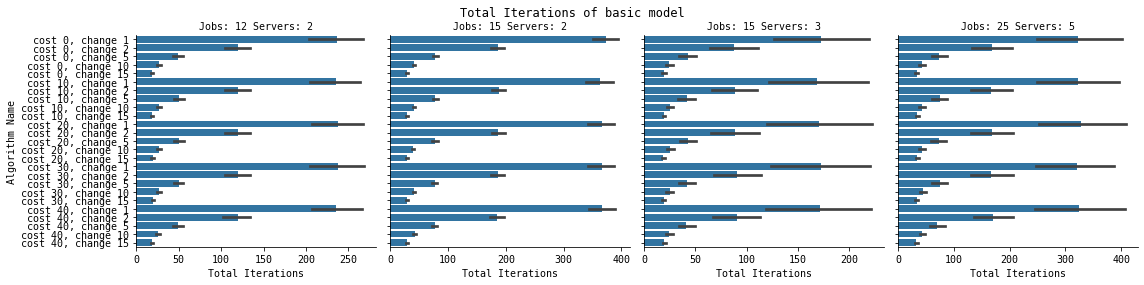

In [7]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=4)
g = g.map(sns.barplot, x_axis, "Algorithm Name").set_titles("{col_name}")

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g

In [8]:
df1 = df.loc[df['Model Name'] == 'Job 25 Server 5']

g = sns.FacetGrid(df1, col='Pos', col_wrap=5, hue='Algorithm Name')
g = g.map(sns.scatterplot, 'Total Iterations', 'Total Money')

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Total Iterations and Money for 25 Jobs and 5 Servers")

g

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 1080x0 with 0 Axes>

Save file location: ../figures/iterative_round/eps/all_money_heat.eps
Save file location: ../figures/iterative_round/png/all_money_heat.png


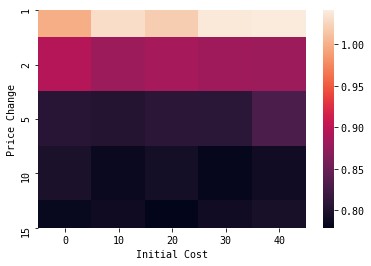

In [28]:
datamap = pd.DataFrame([(price_change, initial_cost, np.mean(df[(df['Initial cost'] == initial_cost) & (df['Price Change'] == price_change)]
                                                             ['Percent Total Money']))
    for initial_cost in df['Initial cost'].unique()
    for price_change in df['Price Change'].unique()
], columns=['Price Change', 'Initial Cost', 'Value']).pivot('Price Change', 'Initial Cost', 'Value')
g = sns.heatmap(datamap)
save_plot(analysis_filename('all', 'money_heat'), "iterative_round", image_formats=(ImageFormat.PNG, ImageFormat.EPS))
g

In [ ]:
uniform = [
    'uniform_price_change_auction_results_basic_j15_s2_0',
    'uniform_price_change_auction_results_basic_j15_s3_0',
    'uniform_price_change_auction_results_basic_j25_s5_0'
]

non_uniform = [
    'non_uniform_price_change_auction_results_basic_j12_s2_0',
    # 'non_uniform_price_change_auction_results_basic_j15_s2_0',
    'non_uniform_price_change_auction_results_basic_j15_s3_0',
    'non_uniform_price_change_auction_results_basic_j25_s5_0'
]

paper = [
    'uniform_price_change_auction_results_fog_j15_s3_0'
]

In [ ]:
def plot_auction_results(encoded_filenames: List[str], y_axis: str, title: str,
                         save_formats: Iterable[ImageFormat] = ()):
    """
    Plots the auction results

    :param encoded_filenames: The list of encoded filenames
    :param y_axis: The y axis on the plot
    :param title: The graph titles
    :param save_formats: List of save formats
    """
    data = []
    test_name: str = ''
    model_names: List[str] = []

    for encoded_filename in encoded_filenames:
        filename, model_name, test_name = decode_filename('paper', encoded_filename)
        model_names.append(model_name)

        with open(filename) as json_file:
            json_data = json.load(json_file)

            for pos, results in enumerate(json_data):
                for name, result in results.items():
                    if type(result) is dict:
                        data.append((model_name, pos, name, result['sum value'], result['total money'],
                                     result['total money'] / results['price change 1']['total money'],
                                     result['solve_time']))
    data = reversed(data)

    df = pd.DataFrame(data, columns=['Model Name', 'Pos', 'Algorithm Name', 'Sum Value', 'Total Money',
                                     'Best Total Money', 'Solve Time'])
    g: sns.FacetGrid = sns.FacetGrid(df, col='Model Name', hue='Algorithm Name')
    g = (g.map(sns.scatterplot, 'Pos', y_axis).set_titles('{col_name}').add_legend())

    g.fig.subplots_adjust(top=0.88)
    g.fig.suptitle(title)

    save_plot(analysis_filename(test_name, y_axis), 'price_change', image_formats=save_formats)
    plt.show()

In [ ]:
plot_auction_results(paper, 'Sum Value', 'Sum Value', save_formats=[ImageFormat.EPS, ImageFormat.PNG])
plot_auction_results(paper, 'Total Money', 'Total Money', save_formats=[ImageFormat.EPS, ImageFormat.PNG])
plot_auction_results(paper, 'Solve Time', 'Solve Time', save_formats=[ImageFormat.EPS, ImageFormat.PNG])

In [ ]:
def plot_multiple_price_auction_results(encoded_filenames: List[str], y_axis: str, title: str,
                                        save_formats: Iterable[ImageFormat] = ()):
    """
    Plots the auction results

    :param encoded_filenames: A list of encoded filenames
    :param y_axis: The y axis on the plot
    :param title: The graph title
    :param save_formats: List of save formats
    """
    data = []
    test_name: str = ''
    model_names: List[str] = []

    for encoded_filename in encoded_filenames:
        filename, model_name, test_name = decode_filename('price_change', encoded_filename)
        model_names.append(model_name)

        with open(filename) as file:
            json_data = json.load(file)

            for pos, results in enumerate(json_data):
                for name, result in results.items():
                    if type(result) is dict:
                        data.append((pos, model_name, 'changed', result['sum value'], result['total money'],
                                     result['solve_time']))
    data = reversed(data)

    df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Sum Value', 'Total Money', 'Solve Time'])
    g: sns.FacetGrid = sns.FacetGrid(df, col='Model Name', hue='Algorithm Name')
    (g.map(sns.scatterplot, 'Pos', y_axis).set_titles('{col_name}'))

    g.fig.subplots_adjust(top=0.88)
    g.fig.suptitle(title)

    save_plot(analysis_filename(test_name, y_axis), 'price_change', image_formats=save_formats)
    plt.show()

In [ ]:
for attribute in ['Sum Value', 'Total Money', 'Solve Time']:
        plot_auction_results(uniform, attribute, '{} of uniform basic model'.format(attribute),
                             save_formats=[ImageFormat.EPS, ImageFormat.PNG])
        plot_multiple_price_auction_results(non_uniform, attribute, '{} of non uniform basic model'.format(attribute),
                                            save_formats=[ImageFormat.EPS, ImageFormat.PNG])
    plot_auction_results(uniform, 'Best Total Money', '{} of uniform basic model'.format('Best Total Money'),
                         save_formats=[ImageFormat.EPS, ImageFormat.PNG])